# Treinando a ResNet34

Este caderno apresenta o treinamento da ResNet 34.

Os dados utilizados já foram classificados manualmente e redimensionados para 250x250 pixels.

Exprimentos iniciais mostraram que utilizar a imagem sem redimensionar, com tamanho retangular, fazia com que fosse cortada (crop) para atender as dimensões escolhidas na hora de montar o databunch.

In [2]:
from fastai.vision import *

In [3]:
path = Path('..')
path.ls()

[PosixPath('../.git'),
 PosixPath('../models'),
 PosixPath('../src'),
 PosixPath('../dataset'),
 PosixPath('../README.md'),
 PosixPath('../labeled_v1.csv'),
 PosixPath('../.ipynb_checkpoints'),
 PosixPath('../labeled_v2.csv')]

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, valid_pct=0.25, csv_labels='labeled_v2.csv',ds_tfms=get_transforms(),
                               size=224, num_workers=4).normalize(imagenet_stats)
data.classes

['match', 'unmatch']

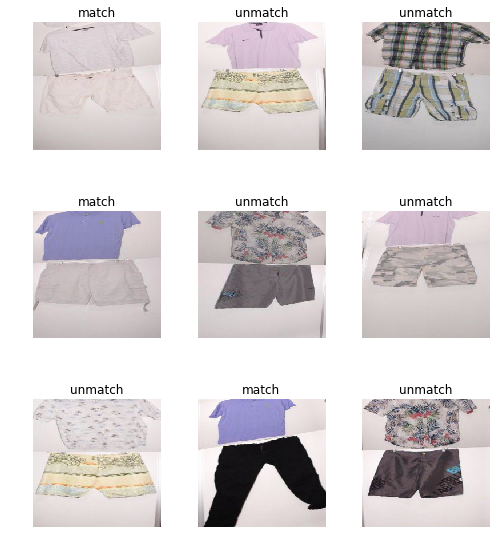

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['match', 'unmatch'], 2, 214, 71)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.344491,0.450650,0.154930,00:02


## Resultados até agora
Após 5 treinamentos, obtivemos uma taxa de erro interessante. Veremos como ficou a matriz de confusão:

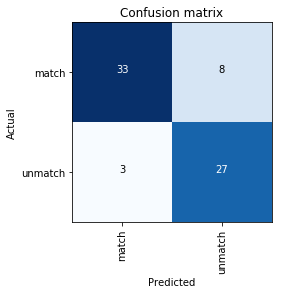

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [11]:
learn.save('resnet34-stage-1')

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('resnet34-stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


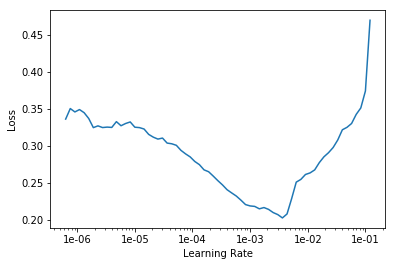

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

## Escolhendo o Learning Rate
Conforme aprendemos com Jeremy (Thanks Jeremy!) utilizamos o `lr_find()` para encontrarmos o melhor `LR`.

Podemos ver um declíve entre `5e-05` e `4-e03`. Escolheremos esse valores para treinar a rede no segundo estágio

In [14]:
learn.fit_one_cycle(3, max_lr=slice(5e-05,4e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.321763,0.742235,0.239437,00:02
1,0.381423,0.451436,0.126761,00:02
2,0.330925,0.414465,0.126761,00:02


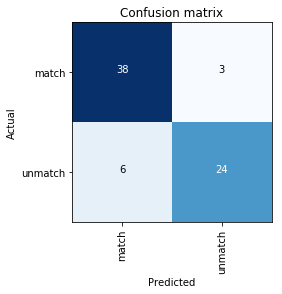

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


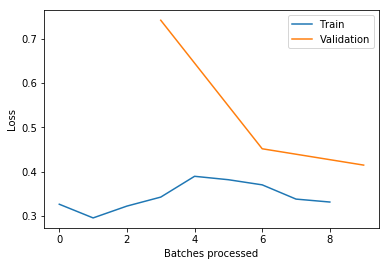

In [16]:
learn.recorder.plot_losses()

In [17]:
learn.save('resnet34-stage-2')

## Curva de `losses`

No gráfico acima fica claro a tendência da rede em diminuir e convergir as perdas conforme o treinamento

Poderíamos treinar mais a rede, mas seguiremos em frente.